# Data Loading and Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the provided unemployment data
df = pd.read_csv('UNRATE.csv')

In [31]:
print(df.columns.tolist())

['observation_date', 'UNRATE', 'DECADE', 'YEAR', 'Decade']


In [ ]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (928, 2)

First 5 rows:


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [33]:
print("Data types:")
print(df.dtypes)
print("\nBasic statistics:")
df['UNRATE'].describe()

Data types:
observation_date    datetime64[ns]
UNRATE                     float64
dtype: object

Basic statistics:


count    928.000000
mean       5.676724
std        1.708352
min        2.500000
25%        4.300000
50%        5.500000
75%        6.700000
max       14.800000
Name: UNRATE, dtype: float64

# Statistical Analysis

#### Calculate overall average unemployment rate

In [34]:
mean_unrate = df['UNRATE'].mean()
print(f"Overall average unemployment rate: {mean_unrate:.2f}%")

Overall average unemployment rate: 5.68%


#### Find minimum and maximum unemployment rates with their dates

In [35]:
min_unrate = df['UNRATE'].min()
max_unrate = df['UNRATE'].max()

# Find all observation_dates corresponding to the minimum unemployment rate
min_dates = df.loc[df['UNRATE'] == min_unrate, 'observation_date']

# maximum
max_dates = df.loc[df['UNRATE'] == max_unrate, 'observation_date']

print(f"Minimum unemployment rate: {min_unrate}%")
print("Occurred on:")
for date in min_dates:
    print(f" - {date}")

print(f"\nMaximum unemployment rate: {max_unrate}%")
print("Occurred on:")
for date in max_dates:
    print(f" - {date}")


Minimum unemployment rate: 2.5%
Occurred on:
 - 1953-05-01 00:00:00
 - 1953-06-01 00:00:00

Maximum unemployment rate: 14.8%
Occurred on:
 - 2020-04-01 00:00:00


#### Calculate unemployment statistics by decade (1950s, 1960s, etc.)

In [36]:
df['DECADE'] = (df['observation_date'].dt.year // 10) * 10
decade_stats = df.groupby('DECADE')['UNRATE'].describe()

print(f"Unemployment statistics by era:{decade_stats}")

Unemployment statistics by era:        count      mean       std  min    25%   50%    75%   max
DECADE                                                          
1940     24.0  4.900000  1.380926  3.4  3.800  4.15  6.250   7.9
1950    120.0  4.511667  1.285614  2.5  3.400  4.30  5.500   7.5
1960    120.0  4.779167  1.072176  3.4  3.800  4.85  5.600   7.1
1970    120.0  6.217500  1.163425  3.9  5.500  5.90  7.050   9.0
1980    120.0  7.272500  1.481083  5.0  6.175  7.20  7.800  10.8
1990    120.0  5.762500  1.049294  4.0  4.900  5.60  6.725   7.8
2000    120.0  5.541667  1.447199  3.8  4.600  5.30  5.800  10.0
2010    120.0  6.220833  2.061365  3.5  4.375  5.65  8.200   9.9
2020     64.0  4.901563  2.282751  3.4  3.600  4.00  5.175  14.8


#### Identify the year with the highest average unemployment rate

In [37]:
df['YEAR'] = df['observation_date'].dt.year
year_avg = df.groupby('YEAR')['UNRATE'].mean()
# max unrate
max_year_unrate = year_avg.max()
# all
max_years = year_avg[year_avg == max_year_unrate].index.tolist()
print(f"Maximum average unemployment rate: {max_year_unrate}%")
print("Occurred in year(s):")
for year in max_years:
    print(f" - {year}")

Maximum average unemployment rate: 9.708333333333334%
Occurred in year(s):
 - 1982


# Business Questions to Answer

#### What was the unemployment rate during major economic events (2008 financial crisis, COVID-19 pandemic)?

In [38]:
crisis_2008 = df[(df['observation_date'] >= '2008-01-01') & (df['observation_date'] <= '2009-12-31')]
covid_2020 = df[(df['observation_date'] >= '2020-01-01') & (df['observation_date'] <= '2022-12-31')]
print(f"2008 Financial Crisis Unemployment Stats:{crisis_2008['UNRATE'].describe()}")
print(f"COVID-19 Pandemic Unemployment Stats:{covid_2020['UNRATE'].describe()}")

2008 Financial Crisis Unemployment Stats:count    24.000000
mean      7.541667
std       1.920579
min       4.900000
25%       5.750000
50%       7.550000
75%       9.500000
max      10.000000
Name: UNRATE, dtype: float64
COVID-19 Pandemic Unemployment Stats:count    36.000000
mean      5.700000
std       2.798163
min       3.500000
25%       3.600000
50%       4.600000
75%       6.475000
max      14.800000
Name: UNRATE, dtype: float64


During the 2008 financial crisis, the average unemployment rate was 7.54%, the highest was 10%, and most of the unemployment rates were between 5.75-9.5%. During the COVID 19 pandemic, the average unemployment rate was 5.7%, which was lower than the financial crisis, but the highest was 14.8%(higher than 2008), and most of the unemployment rates were between 3.6-6.48%.

####  Which decade had the most stable unemployment rates (lowest standard deviation)?

In [39]:
most_stable_decade = decade_stats['std'].idxmin()
lowest_std = decade_stats['std'].min()

print(f"\nThe most stable unemployment rates occurred in the {most_stable_decade}s, with a standard deviation of {lowest_std}.")


The most stable unemployment rates occurred in the 1990s, with a standard deviation of 1.0492944808598896.


The most stable unemployment rates occurred in the 1990s, with a standard deviation of 1.0492944808598896.

#### What’s the trend in unemployment over the last 10 years?

C:\Users\19216\AppData\Local\Temp\ipykernel_20568\4206731177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['YEAR'] = recent_df['observation_date'].dt.year


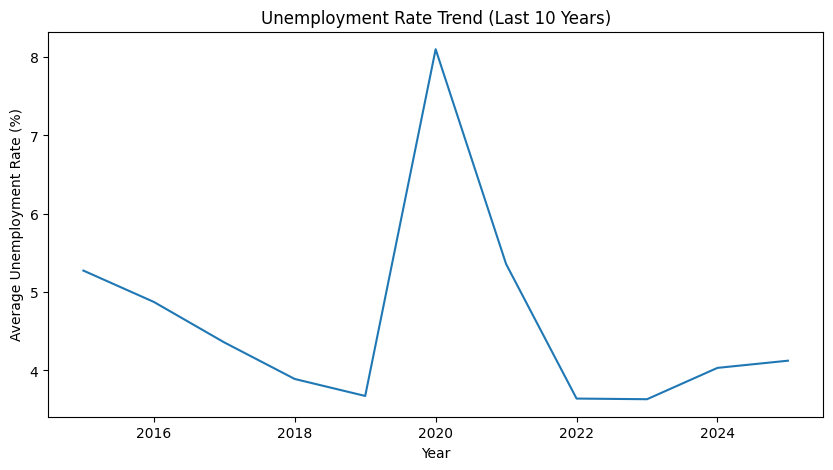

In [40]:
recent_df = df[df['observation_date'].dt.year >= 2015]
recent_df['YEAR'] = recent_df['observation_date'].dt.year
yearly_avg = recent_df.groupby('YEAR')['UNRATE'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values)
plt.title('Unemployment Rate Trend (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()


In the past decade, the unemployment rate slowly declined from 2015 to 2019, and then rose sharply due to the impact of the COVID-19 pandemic, reaching a peak of 8 in 2020, and then fell sharply to 2022 and then slowly rose again.

# Data Visualization

#### Create a line chart showing unemployment rate over time
#### Create a bar chart showing average unemployment by decade
#### Save both charts as PNG files
#### Add proper titles, labels, and formatting

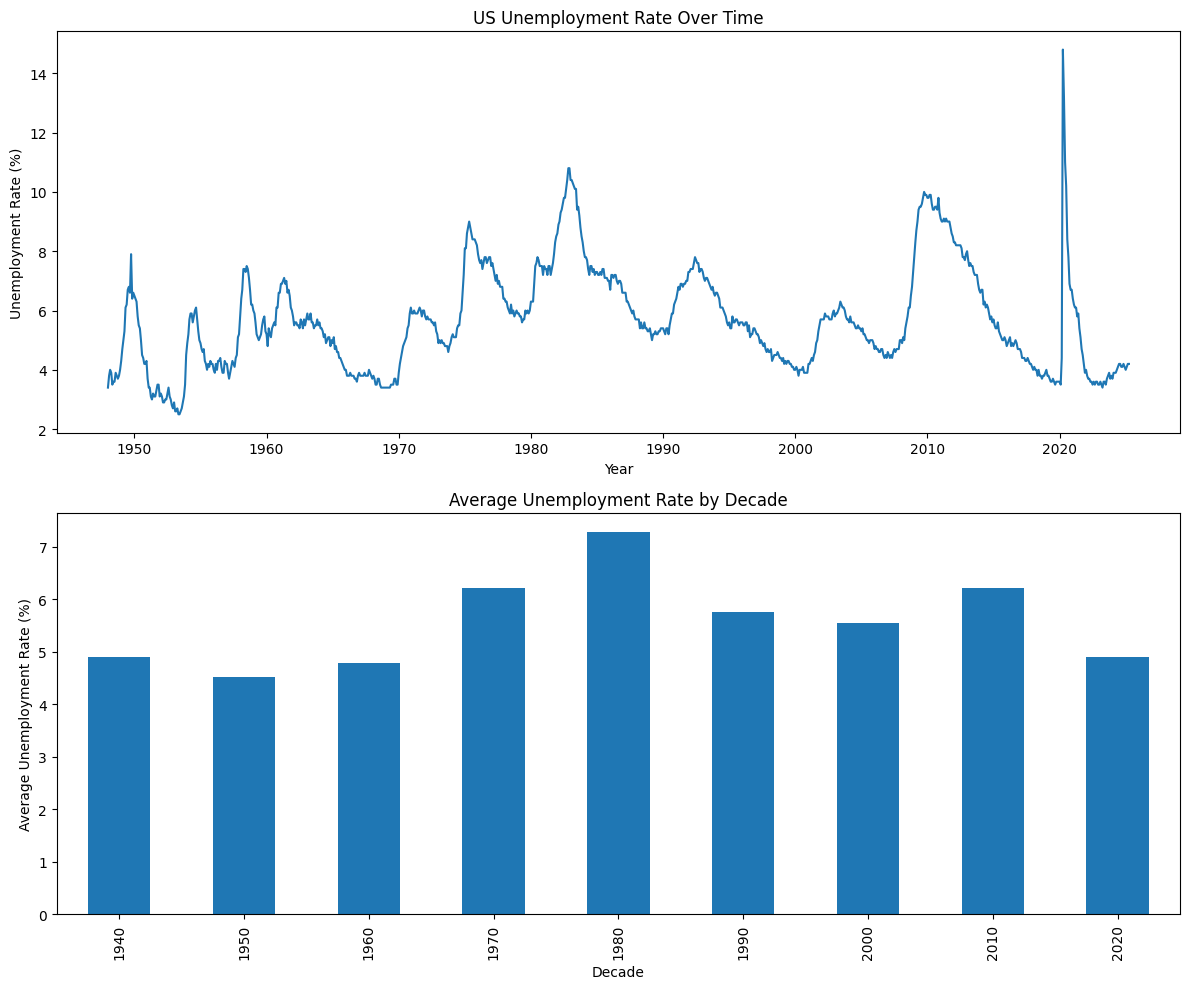

In [41]:
# Calculate decade averages
df['Decade'] = (df['observation_date'].dt.year // 10) * 10
decade_avg = df.groupby('Decade')['UNRATE'].mean()

# Create visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

 # Time series plot
ax1.plot(df['observation_date'], df['UNRATE'])
ax1.set_title('US Unemployment Rate Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)')

# Decade averages
decade_avg.plot(kind='bar', ax=ax2)
ax2.set_title('Average Unemployment Rate by Decade')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Average Unemployment Rate (%)')

# Save and Show
plt.tight_layout()
plt.savefig('unemployment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()